# PyConUK 2016

Ian Ozsvald, 2016-09-13

Goal: Introduce the basic concepts of 2-class classification using scikit-learn and a well-documented problem, also providing a workflow so you can go and do similar things on your own data.

In [1]:
import pandas as pd

# https://www.kaggle.com/c/titanic/data
df = pd.read_csv("titanic_train.csv")
confusion_matrix_labels = ['Died', 'Survived']

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print("Survived isnull:", df['Survived'].isnull().sum())
print("Sex isnull:", df['Sex'].isnull().sum())
print("Pclass isnull:", df['Pclass'].isnull().sum())
print("Age isnull:", df['Age'].isnull().sum())
print("Fare isnull:", df['Fare'].isnull().sum())

Survived isnull: 0
Sex isnull: 0
Pclass isnull: 0
Age isnull: 177
Fare isnull: 0


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

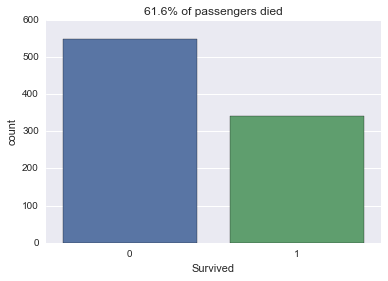

In [4]:
_=sns.countplot(df['Survived'])
pc_survived = (1.0-(df['Survived'].sum() / df.shape[0]))*100
_=plt.title("{:2.1f}% of passengers died".format(pc_survived))

In [5]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

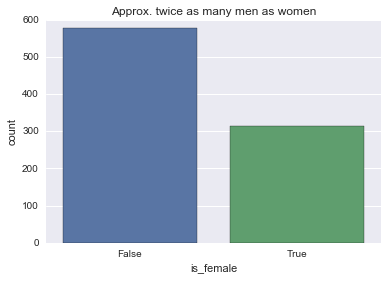

In [6]:
# convert 'male' 'female' to boolean indicator
df['is_female'] = df['Sex']=="female"
sns.countplot(df['is_female']) 
_=plt.title("Approx. twice as many men as women")

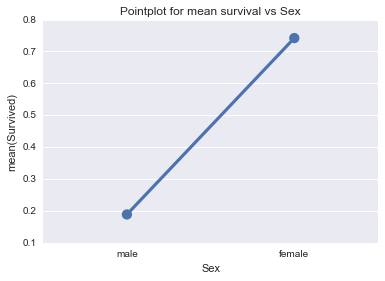

In [7]:
sns.pointplot(data=df, x='Sex', y='Survived', ci=None)
_=plt.title("Pointplot for mean survival vs Sex")

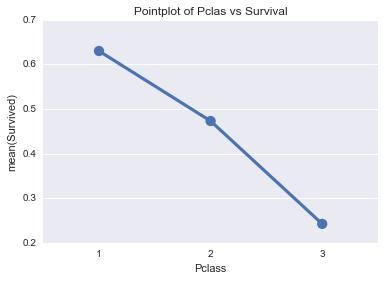

In [8]:
sns.pointplot(data=df, x='Pclass', y='Survived', ci=None)
_=plt.title("Pointplot of Pclas vs Survival")

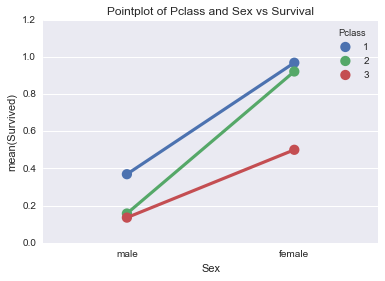

In [9]:
sns.pointplot(data=df, x='Sex', y='Survived', hue='Pclass', ci=None)
_=plt.title("Pointplot of Pclass and Sex vs Survival")

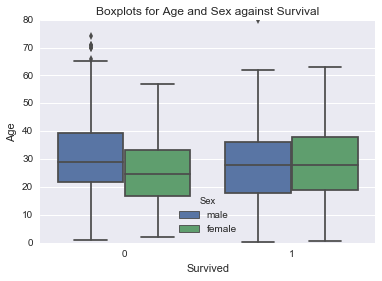

In [10]:
_=sns.boxplot(data=df, x="Survived", y="Age", hue="Sex")
_=plt.title("Boxplots for Age and Sex against Survival")
# note NaN Ages are dropped by seaborn
# first, second (median) and third quartiles for the box
# extents to 1.5 IQR and any outliers

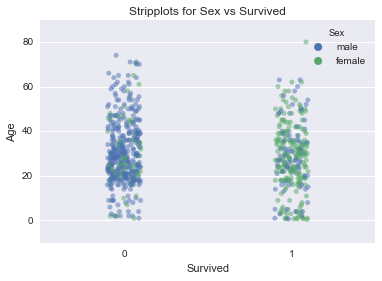

In [11]:
_=sns.stripplot(data=df, x="Survived", y="Age", hue="Sex", jitter=True, alpha=0.5)
_=plt.title("Stripplots for Sex vs Survived")
# first, second (median) and third quartiles for the box
# extents to 1.5 IQR and any outliers

## Build a first classifier with a single input

In [12]:
X = df[['is_female']]
y = df['Survived']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=0)
print("Training and test set sizes:", X_train.shape, X_test.shape)

Training and test set sizes: (623, 1) (268, 1)


## Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#np.set_printoptions(precision=2)

def plot_confusion_matrix_with_annots(cm, labels, cmap=plt.cm.Blues, title="Confusion matrix", ax=None):
    '''Plot a normalised confusion matrix, annotated with classification counts'''

    cm_df = pd.DataFrame(data=cm, columns=labels, index=labels).sort_index(ascending=False)
    cmn_df = cm_df.apply(lambda x: x/x.sum(), axis=1)

    if ax is None:
        fig, ax = plt.subplots()

    fmt = "" # disable string formatting, display the raw counts
    sns.heatmap(cmn_df, annot=cm_df.values, vmin=0, vmax=1, cmap=cmap, ax=ax, fmt=fmt)

    plt.ylabel('True label')
    plt.yticks(rotation=90)
    plt.xlabel('Predicted label')
    plt.xticks(rotation=45)
    plt.title(title)

## Create a Dummy Classifier

If we can't outperform this then our machine learning either isn't doing anything useful or we've made a mistake.

In [14]:
from sklearn.dummy import DummyClassifier
clf_dummy = DummyClassifier(strategy="most_frequent")
clf_dummy.fit(X_train, y_train)
print("Scoring on testing data:", clf_dummy.score(X_test, y_test))

Scoring on testing data: 0.626865671642


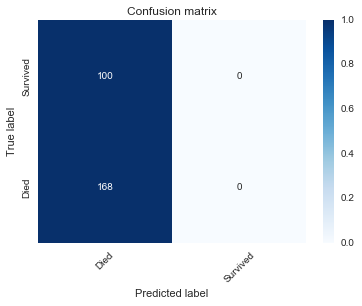

In [15]:
cm = confusion_matrix(y_test, clf_dummy.predict(X_test))
plot_confusion_matrix_with_annots(cm, labels=confusion_matrix_labels)

## Create a RandomForest Classifier

This is a fairly powerful classifier that operates with few data-preparation requirements.

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
y_test[:10].values # get numpy array from Series

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [18]:
y_predicted = clf.predict(X_test) # numpy array
y_predicted[:10]

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [19]:
print("Scoring on training data:", clf.score(X_train, y_train))
print("Scoring on testing data:", clf.score(X_test, y_test))

Scoring on training data: 0.786516853933
Scoring on testing data: 0.787313432836


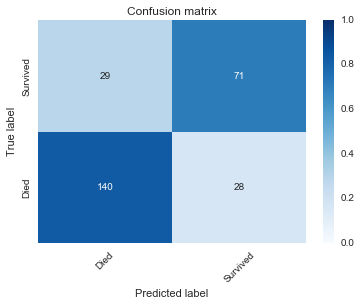

In [20]:
cm = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix_with_annots(cm, labels=confusion_matrix_labels)

In [21]:
from sklearn.cross_validation import cross_val_score
cv_scores = cross_val_score(clf, X, y)
print("Mean score {:0.3f} +/- {:0.2f}".format(cv_scores.mean(), cv_scores.std()*2))

Mean score 0.787 +/- 0.02


# Try Pclass on its own

In [22]:
X = df[['Pclass']]
y = df['Survived']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
print("Training and test set sizes:", X_train.shape, X_test.shape)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
# not very predictive!

Training and test set sizes: (623, 1) (268, 1)
0.672552166934
0.694029850746


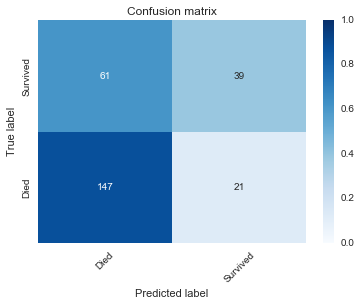

In [23]:
cm = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix_with_annots(cm, labels=confusion_matrix_labels)

In [24]:
from sklearn.cross_validation import cross_val_score
cv_scores = cross_val_score(clf, X, y)
print("Mean score {:0.3f} +/- {:0.2f}".format(cv_scores.mean(), cv_scores.std()*2))

Mean score 0.670 +/- 0.10


## Add Pclass

Actually this hardly helps things at all

In [25]:
X = df[['is_female', 'Pclass']]
y = df['Survived']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=0)
print("Training and test set sizes:", X_train.shape, X_test.shape)

clf.fit(X_train, y_train)
print("Scoring on training data:", clf.score(X_train, y_train))
print("Scoring on testing data:", clf.score(X_test, y_test))

Training and test set sizes: (623, 2) (268, 2)
Scoring on training data: 0.786516853933
Scoring on testing data: 0.787313432836


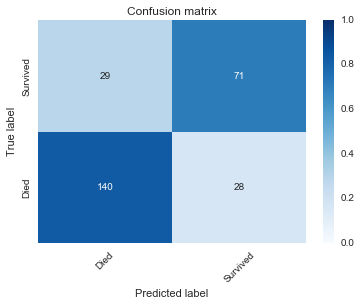

In [26]:
cm = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix_with_annots(cm, labels=confusion_matrix_labels)

In [27]:
cv_scores = cross_val_score(clf, X, y)
print("Mean score {:0.3f} +/- {:0.2f}".format(cv_scores.mean(), cv_scores.std()*2))

Mean score 0.777 +/- 0.04


## Replace NaN for Age with a sentinel value

If we replace NaN values with a sentinel value that's chosen to be 'a long way away' from the next nearest real value, we'll be able to spot the sentinel when we're debugging our data and the RandomForest classifier will be able to use this column of data as a feature.

In [28]:
df['Age'].min()

0.41999999999999998

In [29]:
df['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [30]:
df['Age'].isnull().sum()

177

In [31]:
df['Age_sentinel'] = df['Age'].fillna(-100)
df['Age_sentinel'].head(10)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5   -100.0
6     54.0
7      2.0
8     27.0
9     14.0
Name: Age_sentinel, dtype: float64

In [32]:
# note Age or Pclass by itself isn't so useful, combined they're useful
feature_names = ['is_female', 'Age_sentinel', 'Pclass']
X = df[feature_names]
y = df['Survived']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
# no real improvement!

0.886035313002
0.753731343284


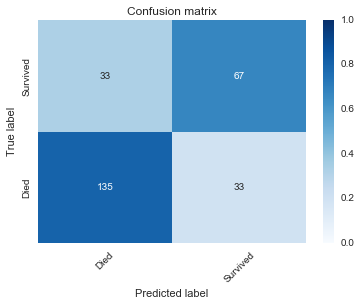

In [33]:
cm = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix_with_annots(cm, labels=confusion_matrix_labels)

In [34]:
cv_scores = cross_val_score(clf, X, y)
print("Mean score {:0.3f} +/- {:0.2f}".format(cv_scores.mean(), cv_scores.std()*2))

Mean score 0.804 +/- 0.05


### Add new features feature

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

df['is_mr'] = df['Name'].str.count(", Mr.")
df['family_size'] = df['SibSp'] + df['Parch']

# note Age or Pclass by itself isn't so useful, combined they're useful
feature_names = ['is_female', 'Age_sentinel', 'Pclass', 
                 'is_mr', 'family_size', 'Fare']
X = df[feature_names]
y = df['Survived']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=0)

clf.fit(X_train, y_train)
print("Scoring on training data:", clf.score(X_train, y_train))
print("Scoring on testing data:", clf.score(X_test, y_test))

Scoring on training data: 0.982343499197
Scoring on testing data: 0.824626865672


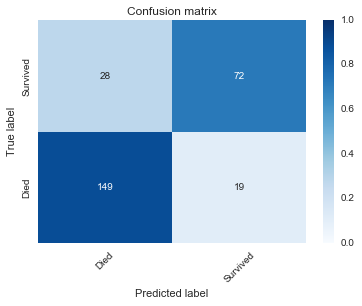

In [36]:
cm = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix_with_annots(cm, labels=confusion_matrix_labels)

In [37]:
cv_scores = cross_val_score(clf, X, y)
print("Mean score {:0.3f} +/- {:0.2f}".format(cv_scores.mean(), cv_scores.std()*2))

Mean score 0.824 +/- 0.04


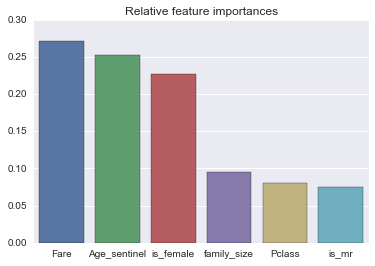

In [38]:
import numpy as np
sns.barplot(feature_names, clf.feature_importances_, order=np.array(feature_names)[np.argsort(clf.feature_importances_)[::-1]])
_=plt.title("Relative feature importances")

# Steps you might take to improve things

* Add more features (do this first) such as:
    * `is_miss`, 
    * maybe the port of embarkation (encoded as a boolean)

* Test if increasing `n_estimators` helps in the RandomForest
* Could you use a different value for the NaN Ages such as a mean?


## Find worst incorrect scores

Take a train/test split, for the test split find the maximally-wrong guesses based on the underlying probabilities.

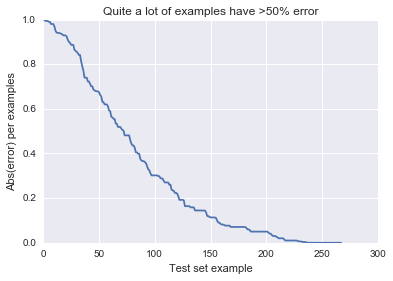

In [39]:
X = df[['Pclass', 'Fare', 'is_mr', 'Fare']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)
max_error = abs(y_proba[:,1] - y_test)
max_error = max_error.sort_values(ascending=False)
max_error.head()
plt.plot(range(max_error.shape[0]), max_error)
plt.xlabel("Test set example")
plt.ylabel("Abs(error) per examples")
_=plt.title("Quite a lot of examples have >50% error")

In [40]:
# eyeball some of the worsts offenders - what ideas do these give you?
df.ix[max_error.index[:3]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female,Age_sentinel,is_mr,family_size
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,False,25.0,1,0
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,False,-100.0,0,0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0,NaN,S,False,54.0,0,1
